In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from tqdm.notebook import tqdm



from constant import NODE_TO_PARTITION_NAME

In [2]:
"""
    This note book presents some common observations based on jobs and apps tables.
    We use the cleaned data here. Please refer to the respected notebook to see 
    the original data and the cleaning process.
    """

'\n    This note book presents some common observations based on jobs and apps tables.\n    We use the cleaned data here. Please refer to the respected notebook to see \n    the original data and the cleaning process.\n    '

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
folder_path = Path('/projects/2/prjs1098//system_analytics_2024/ear_data')
folder_path_for_fig_saving = Path('/projects/2/prjs1098//system_analytics_2024/figures_for_presentation')
file_path_parquet_reading = folder_path / 'job_apps_cleaned_2025-02-24.parquet.gzip'
df = pd.read_parquet(file_path_parquet_reading)
df.head(n=5)

,job_id,step_id,app_id,start_time,end_time,start_mpi_time,end_mpi_time,node_id,signature_id,power_signature_id,node_type,start_time_sec,end_time_sec,start_mpi_time_sec,end_mpi_time_sec
1,0,4294967291,aiida-15733,2023-10-04 00:03:02,2023-10-04 06:57:26,1970-01-01,1970-01-01,tcn1177,2184761.0,6870166,tcn,1696377782,1696402646,0,0
2,1,0,bt-mz.D.128,2024-01-30 12:58:48,2024-01-30 12:59:01,1970-01-01,1970-01-01,tcn510,NaN,8733020,tcn,1706619528,1706619541,0,0
3,1,4294967291,run_snel.sh,2024-03-21 12:46:28,2024-03-21 12:47:21,1970-01-01,1970-01-01,fcn96,NaN,9904374,fcn,1711025188,1711025241,0,0
4,1,4294967291,run_snel.sh,2024-03-21 12:46:28,2024-03-21 12:47:21,1970-01-01,1970-01-01,fcn97,NaN,9904373,fcn,1711025188,1711025241,0,0
5,1,4294967291,run_snel.sh,2024-03-21 12:46:28,2024-03-21 12:47:21,1970-01-01,1970-01-01,tcn95,NaN,10188067,tcn,1711025188,1711025241,0,0


In [4]:
"""
QUESTION: 
see the last 3 rows in the prvious table.
   Note that in EAR database we had:
   job_id     step_id     start_time     end_time   node
   100         1            t1            t2        n1
   100         2 or 1       t3            t4        n2
   
   
   
We are not sure which time is the actual start time or end time  for a job.
Based on an eduacted guess, we save the minium start time for each job id as the
start time for that job and the maximum end time for the end time of that job.
We can always use the other columns!
    """
# 
# Here I calculate the min time for an id and step id
df_start = pd.DataFrame(df.groupby('job_id')['start_time'].min()).reset_index()
df_end = pd.DataFrame(df.groupby('job_id')['end_time'].max()).reset_index()
df_time = pd.merge(left=df_start, right=df_end)

df_time.rename(columns={'start_time':'job_start_time', 
                        'end_time':'job_end_time'}, inplace=True)
df = pd.merge(df, df_time, how='inner', on='job_id').copy()
df.tail(n=5)


# save it here to be used for the sinfo training


,job_id,step_id,app_id,start_time,end_time,start_mpi_time,end_mpi_time,node_id,signature_id,power_signature_id,node_type,start_time_sec,end_time_sec,start_mpi_time_sec,end_mpi_time_sec,job_start_time,job_end_time
17410951,9667683,0,9af47b17-3df0-4055-979d-22c2e78aab6b,2025-01-29 12:36:24,2025-01-29 12:36:28,1970-01-01,1970-01-01,tcn6,NaN,17566519,tcn,1738154184,1738154188,0,0,2025-01-29 12:36:22,2025-01-29 12:36:28
17410952,9667683,4294967291,9af47b17-3df0-4055-979d-22c2e78aab6b,2025-01-29 12:36:22,2025-01-29 12:36:28,1970-01-01,1970-01-01,tcn6,NaN,17566520,tcn,1738154182,1738154188,0,0,2025-01-29 12:36:22,2025-01-29 12:36:28
17410953,22035615,4294967291,debug,2024-02-18 11:31:10,2024-02-18 11:41:10,1970-01-01,1970-01-01,tcn430,NaN,9197994,tcn,1708255870,1708256470,0,0,2024-02-18 11:31:10,2024-02-18 11:41:10
17410954,22035615,4294967291,debug,2024-02-18 11:31:10,2024-02-18 11:41:10,1970-01-01,1970-01-01,tcn431,NaN,9197990,tcn,1708255870,1708256470,0,0,2024-02-18 11:31:10,2024-02-18 11:41:10
17410955,22035615,4294967291,debug,2024-02-18 11:31:10,2024-02-18 11:41:10,1970-01-01,1970-01-01,tcn440,NaN,9197958,tcn,1708255870,1708256470,0,0,2024-02-18 11:31:10,2024-02-18 11:41:10


In [5]:
"Add features that you like here and then use them in the next block! "

df['job_start_time_hour'] = df['job_start_time'].dt.hour
df['job_start_time_day'] = df['job_start_time'].dt.day
df['job_start_time_date'] = df['job_start_time'].dt.date
df['job_start_time_day_name'] = df['job_start_time'].dt.day_name()
df['job_start_time_week'] = df['job_start_time'].dt.isocalendar().week
df['job_start_time_month'] = df['job_start_time'].dt.month
df['job_start_time_year_quarter'] = pd.PeriodIndex(df['job_start_time'], freq='Q')
df['job_start_year_month'] = pd.PeriodIndex(df['job_start_time'], freq='M')
df['job_start_time_year'] = df['job_start_time'].dt.year



# these are based on start of job-step time
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day
df['start_time_date'] = df['start_time'].dt.date
df['start_time_day_name'] = df['start_time'].dt.day_name()
df['start_time_week'] = df['start_time'].dt.isocalendar().week
df['start_month'] = df['start_time'].dt.month
df['start_quarter'] = pd.PeriodIndex(df['start_time'], freq='Q')
df['start_year_month'] = pd.PeriodIndex(df['start_time'], freq='M')
df['start_year'] = df['start_time'].dt.year




# Add partition name

df['partition'] = (df['node_id'].apply(lambda x: NODE_TO_PARTITION_NAME.get(x, 'other')))

# save the data for the machine learning task
# df.to_parquet(folder_path / 'job_number_history_cleaned.parquet.gzip', compression='gzip')


In [6]:
# df[(df['partition']=='other')]['node_id'].unique

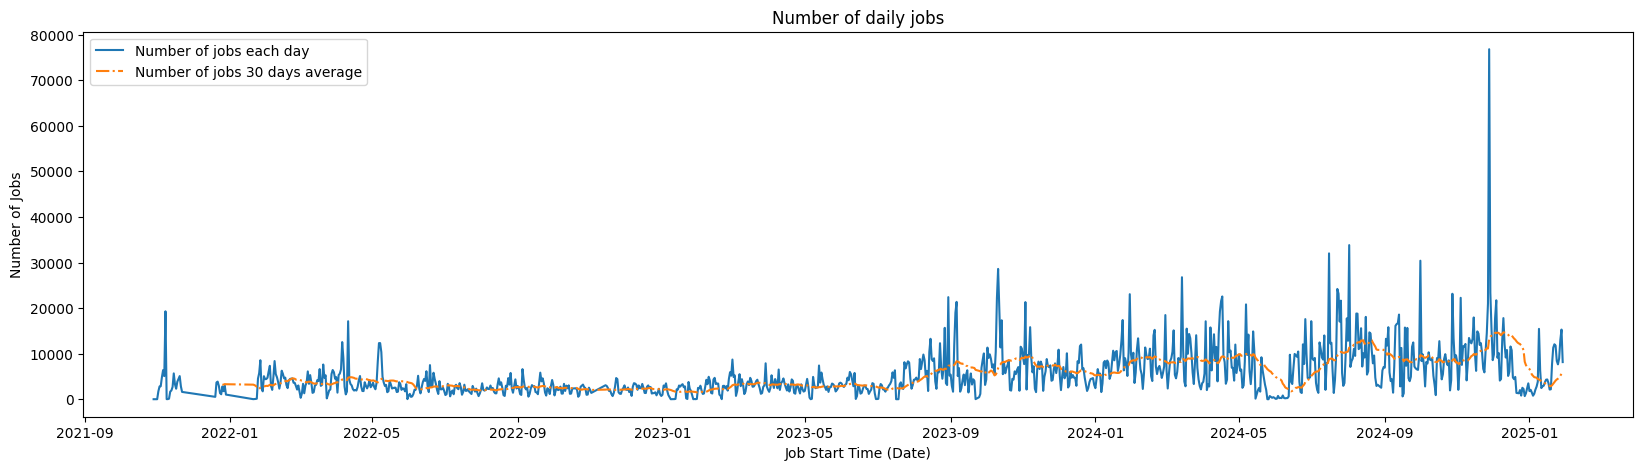

In [7]:
""" 
We show the number of jobs submitted in each day.
Observation: as the Snellius hardware develops it gets more and more jobs.
"""

df_temp = df.groupby(['job_start_time_date'])['job_id'].aggregate(['nunique'])
df_temp['moving_average'] = df_temp['nunique'].rolling(window=30).mean()
df_temp.reset_index(inplace=True)
df_temp.rename(columns={"nunique":"Number_of_jobs_submitted"}, inplace=True)


# fig = go.Figure()
# # Create and style traces
# fig.add_trace(go.Scatter(x=df_temp['job_start_time_date'], y=df_temp['Number_of_jobs_submitted'], 
#                          name='Number of jobs each day'))
# fig.add_trace(go.Scatter(x=df_temp['job_start_time_date'], y=df_temp['moving_average'], 
#                          name= 'Number of jobs 30 days average'))

# fig.update_layout(title=dict(text='Number of daily jobs'))


# # Ensure layout dimensions are set explicitly
# if fig.layout.width is None:
#     fig.layout.width = 1000  # Set this to match how you want it displayed
# if fig.layout.height is None:
#     fig.layout.height = 800  # Set this to match how you want it displayed

# fig.write_image('./results/jobs_number.pdf', engine="kaleido",  width=1600, height=600)


# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

# Plot the number of jobs each day
sns.lineplot(data=df_temp, x='job_start_time_date', 
             y='Number_of_jobs_submitted', label='Number of jobs each day', ax=ax)

# Plot the moving average
sns.lineplot(data=df_temp, x='job_start_time_date', y='moving_average', 
             label='Number of jobs 30 days average', linestyle='-.', ax=ax)

# Add title and labels
plt.title('Number of daily jobs')
plt.xlabel('Job Start Time (Date)')
plt.ylabel('Number of Jobs')
plt.legend()


fig.savefig(folder_path_for_fig_saving / "jobs_daily.pdf", transparent=True)

# Show the plot
plt.show()







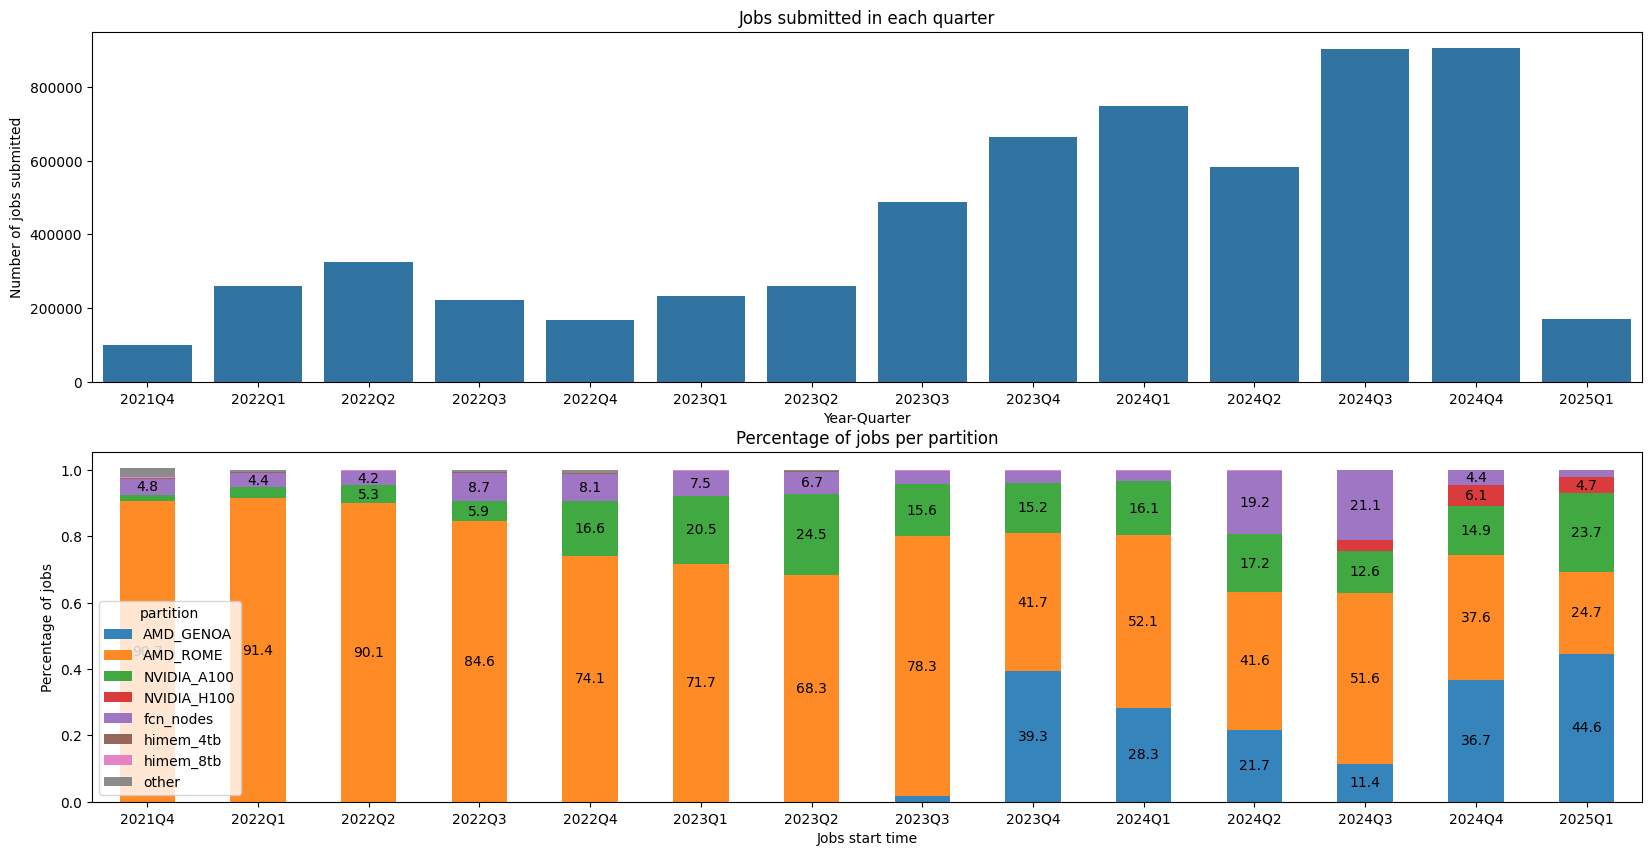

In [ ]:
# turn this into a plot ly plot

df_temp = (df.groupby(['job_start_time_year_quarter'])['job_id']
 .aggregate(['nunique']))

df_temp.reset_index(inplace=True)
df_temp.rename(columns={"nunique":"Number_of_jobs_submitted"}, inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
sns.barplot(df_temp, x='job_start_time_year_quarter',
            y='Number_of_jobs_submitted', ax=ax[0])
# ax.grid(True)

ax[0].set_xlabel("Year-Quarter")
ax[0].set_ylabel("Number of jobs submitted")
ax[0].set_title("Jobs submitted in each quarter")




# finding the percentage of jobs per node type
total_in_each_season = (df.groupby('job_start_time_year_quarter')[['job_id']].nunique())
total_in_each_season.rename(columns={"job_id":"Number_of_jobs_submitted"}, inplace=True)
# count to get the number of jobs per node type in each quarter
df_temp = (df.groupby(['job_start_time_year_quarter', 'partition'])[['job_id']].nunique()) 
df_temp.reset_index(level=1, inplace=True)
# divide to get the fraction 
df_temp['faraction_of_jobs'] = df_temp['job_id'] / total_in_each_season['Number_of_jobs_submitted']
df_temp.reset_index(inplace=True)
df_temp.drop('job_id', inplace=True, axis=1)
# pivot the table
df_stacked = df_temp.pivot_table(index='job_start_time_year_quarter', columns='partition')
df_stacked = df_stacked.droplevel(level=0, axis=1).copy()
# reorder the columns
# df_stacked = df_stacked[['tcn', 'fcn', 'gcn', 'hcn']]

g= df_stacked.plot(kind='bar', stacked=True,
                alpha=0.9, ax=ax[1], use_index=False)
threshold = 0.04  # Replace with your desired threshold

for p in g.containers:
    labels = [f'{100 * v.get_height():.1f}' if v.get_height() > threshold else '' for v in p]
    g.bar_label(p, labels=labels, label_type='center')
    
# ax[1].set_xlabel("Time")
ax[1].set_xlabel("Jobs start time")
ax[1].set_ylabel("Percentage of jobs")
ax[1].set_title("Percentage of jobs per partition")
ax[1].set_xticklabels(df_stacked.index.tolist(), rotation=0)


fig.savefig(folder_path_for_fig_saving / "jobs_per_quarter.pdf", transparent=True)




"""
    Observations: 
    1) In 2023Q3 we can see a sudden increase which can be explained by the introduction of the pahses in
    the HPC system.
    2) What happened in 2024Q2 is not clear since there is a sudden decrease in the the number of submiited jobs!
    3 ) Number of submitted jobs for fcn nodes has a sudden increase at 2024Q1!
    
    """

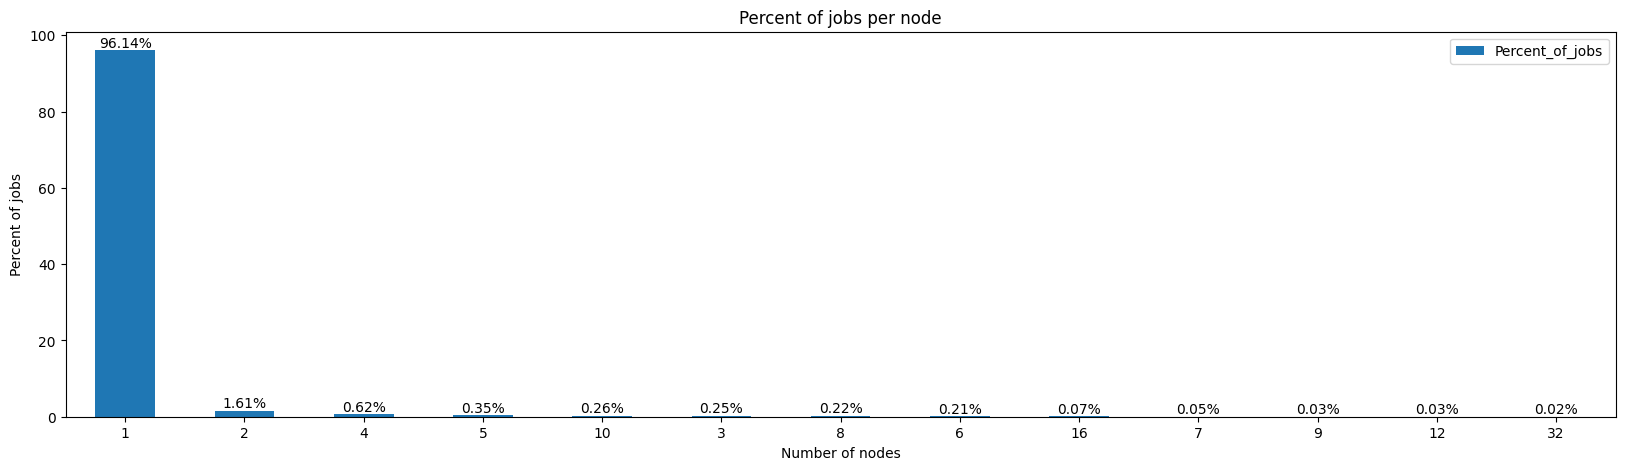

In [11]:
"""
Number of nodes used per job: 
intersting to see that around 96 percents of the jobs use 1 node and around 1.5 percent use 2 nodes

"""
# count the number of nodes for each job id
df_temp = (df.groupby(['job_id'])['node_id'].aggregate(['nunique']))
df_temp.reset_index(inplace=True)
df_temp.rename(columns={"nunique":"Number_of_nodes"}, inplace=True)
# group the data based on the number of nodes
df_temp = (df_temp.groupby(['Number_of_nodes'])['job_id'].aggregate(['nunique'])).copy()
df_temp.reset_index(inplace=True)
df_temp.rename(columns={"nunique":"Total_number_of_jobs"}, inplace=True)
# get the fraction
df_temp['Percent_of_jobs'] = (100 * df_temp['Total_number_of_jobs']) / (df_temp['Total_number_of_jobs'].sum())
df_temp.sort_values(by='Percent_of_jobs', inplace=True, ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
g = df_temp[0:13].plot(kind='bar', x='Number_of_nodes', y='Percent_of_jobs', ax=ax)
for p in g.containers:
    g.bar_label(p, fmt='%.2f%%', label_type='edge')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Percent of jobs")
ax.set_title("Percent of jobs per node")
ax.set_xticklabels(list(df_temp['Number_of_nodes'])[0:13], rotation=0)


fig.savefig(folder_path_for_fig_saving / "jobs_per_node_percent.pdf", transparent=True)


plt.show()

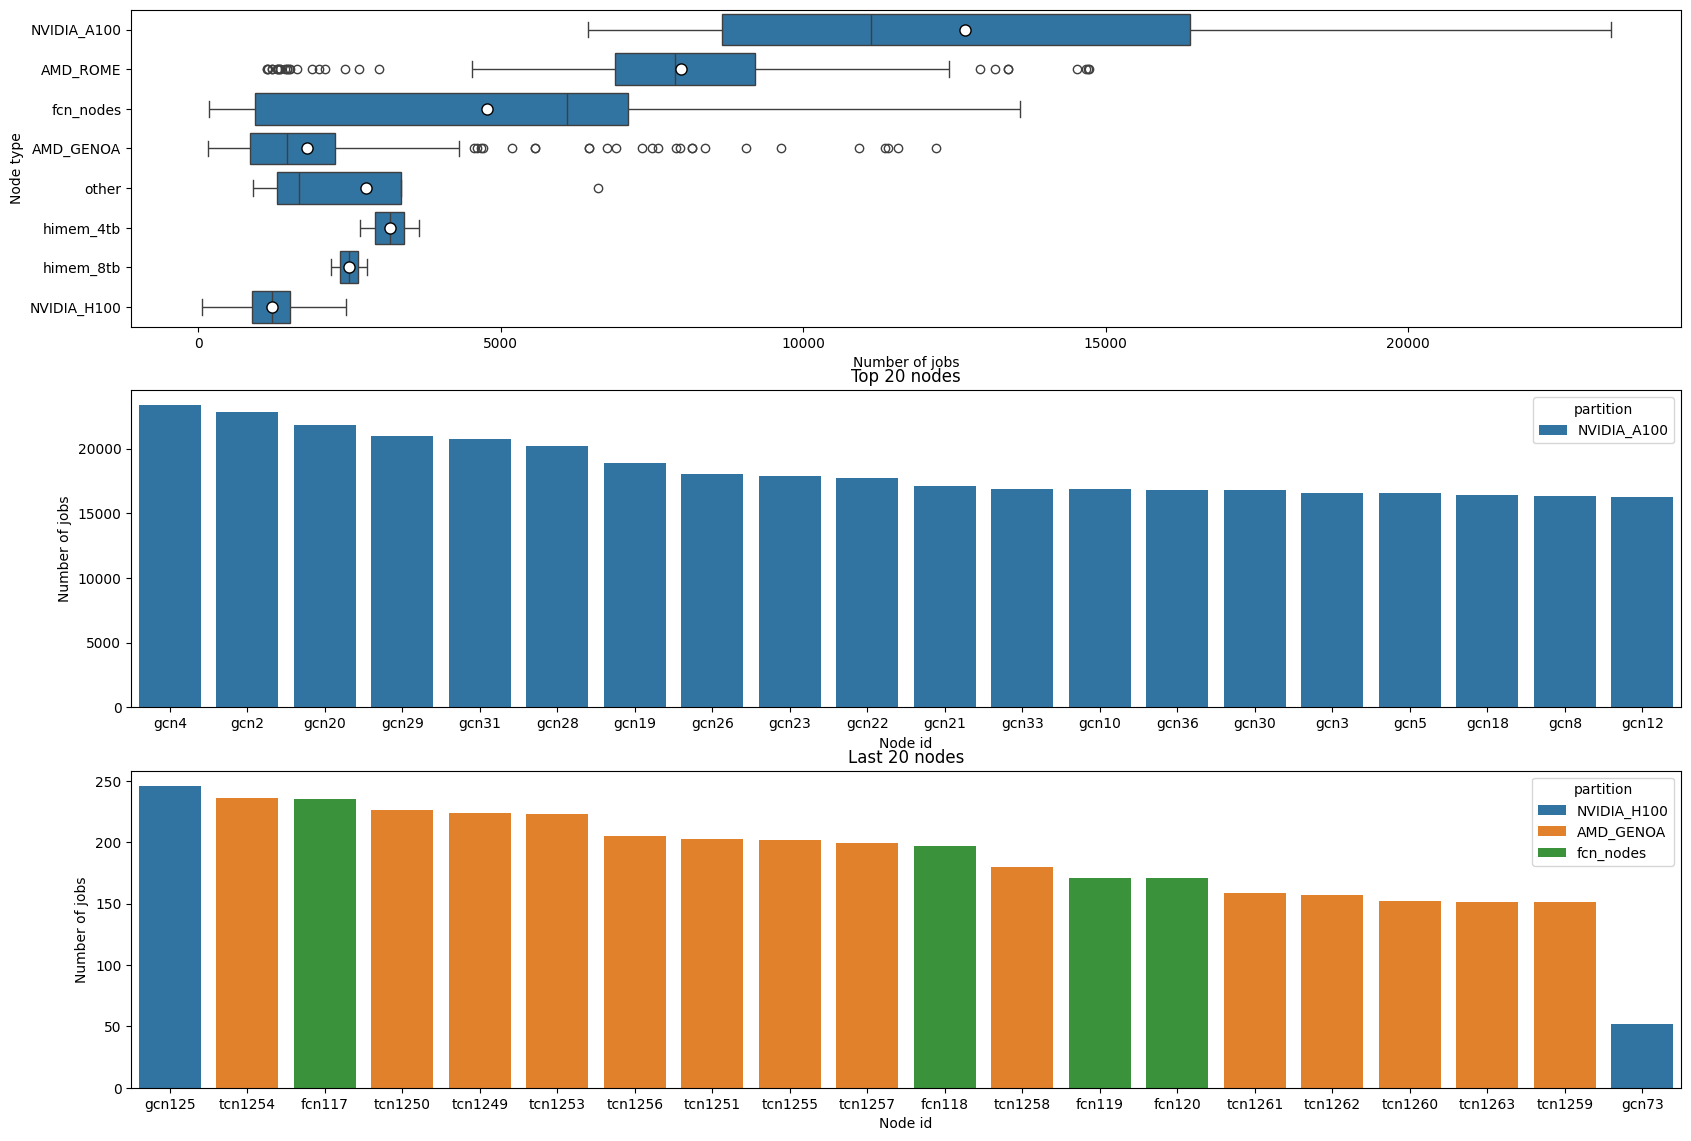

In [12]:
"""
This figure shows the total number of jobs for the nodes (the top one).
Note that we are counting unique jobs.
Observationss: 
            1) on average, gcn nodes have done more jobs than other nodes. This can be seen in the location
            for the avearge in the top figure. 
            2): The data for tcn, gcn and fcn nodes are skewed, e.g, around 50 percent of gcn nodes
            do not run as many jobs as their peer groups. We have shown in  the last figure these lazy nodes, i.e.,
            the nodes with fewest ever done jobs. This might be explained that some of these nodes
            are not avaiable anymore or they have been introduced recently. 
            

    """
# count the unique jobs that happend on a node
df_temp = (df.groupby(['node_id'])[['job_id']]
                      .nunique().
                      sort_values('job_id', ascending=False))
df_temp.reset_index(inplace=True)
df_temp.rename(columns={"job_id":"Number_of_jobs"}, inplace=True)

# get the node type based on the node name
# df_temp['node_type'] = df_temp['node_id'].str[0:3]

df_temp['partition'] = (df_temp['node_id'].apply(lambda x: NODE_TO_PARTITION_NAME.get(x, 'other')))



fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 14))
sns.boxplot(df_temp, x='Number_of_jobs', y='partition', showmeans=True, ax=ax[0],
            meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'8'})
# sns.ecdfplot(df_temp, x='Number_of_jobs', hue='node_type', ax=ax[1])
sns.barplot(df_temp.iloc[0:20], x='node_id', y='Number_of_jobs', hue='partition', ax=ax[1])
sns.barplot(df_temp.iloc[-20:], x='node_id', y='Number_of_jobs', hue='partition', ax=ax[2])


ax[0].set_ylabel("Node type")
ax[0].set_xlabel("Number of jobs")

ax[1].set_title("Top 20 nodes")
ax[1].set_ylabel("Number of jobs")
ax[1].set_xlabel('Node id')

ax[2].set_title("Last 20 nodes")
ax[2].set_ylabel("Number of jobs")
ax[2].set_xlabel("Node id")


fig.savefig(folder_path_for_fig_saving / "jobs_per_partition_stat.pdf", transparent=True)

plt.show()





In [13]:
""" 
We would like to find the node waiting time, meaning how long does it take for
a node to be called for doing the next job or step in a job?
This is the closest signal to IDLE mode(?) available from Sinfo we can have.

See following dummy example and run the code: 

df_dummy = pd.DataFrame({'node_id': ['node_A', 'node_B']*10,
                   'start_time_sec': np.random.randint(100, size=(20))}
                   )

df_dummy['end_time_sec'] = df_dummy['start_time_sec'] + np.random.randint(20, size=(20))

df_dummy.sort_values(['node_id', 'start_time_sec'], inplace=True)

df_dummy['prev_max_end_time'] = (df_dummy.groupby('node_id')['end_time_sec']
                           .expanding().max()
                           .groupby('node_id').shift(1)
                           .reset_index(level=0, drop=True))  

df_dummy['node_waiting_time'] = df_dummy['start_time_sec'] - df_dummy['prev_max_end_time']
display(df_dummy)

"""




df_waiting_time = df[['job_id', 'step_id', 'node_id', 'start_time_sec', 'end_time_sec', 'node_type']].copy()
df_waiting_time.sort_values(by=['node_id', 'start_time_sec'], inplace=True)

# finding the maximum end time that happen before this
df_waiting_time['prev_max_end_time'] = (df_waiting_time.groupby('node_id')['end_time_sec']
                           .expanding().max()
                           .groupby('node_id').shift(1)
                           .reset_index(level=0, drop=True))  

df_waiting_time['node_waiting_time'] = df_waiting_time['start_time_sec'] - df_waiting_time['prev_max_end_time']

df_waiting_time['node_waiting_time_minute'] = (df_waiting_time['node_waiting_time'])/60



# clip the long waiting times happening due to maintenance also we are clipping from below to
# remove the long jobs
upper_bound = df_waiting_time.groupby('node_id')['node_waiting_time_minute'].transform(lambda x: x.quantile(0.98))
lower_bound = df_waiting_time.groupby('node_id')['node_waiting_time'].transform(lambda x: x.quantile(0.02))
df_waiting_time['clipped_node_waiting_time_minute'] = df_waiting_time['node_waiting_time_minute'].clip(lower= lower_bound,
                                                                                                       upper=upper_bound)



# put a random integer here
random_int = 324563
df_waiting_time.iloc[random_int:random_int+10, :]

,job_id,step_id,node_id,start_time_sec,end_time_sec,node_type,prev_max_end_time,node_waiting_time,node_waiting_time_minute,clipped_node_waiting_time_minute
10604131,5937474,4294967291,fcn32,1713287078,1713287338,fcn,1.713287e+09,-273.0,-4.550000,-4.550000
10604132,5937475,4294967291,fcn32,1713287079,1713287361,fcn,1.713287e+09,-272.0,-4.533333,-4.533333
10604377,5937709,4294967291,fcn32,1713287393,1713287648,fcn,1.713287e+09,32.0,0.533333,0.533333
10604379,5937711,4294967291,fcn32,1713287393,1713287696,fcn,1.713288e+09,-255.0,-4.250000,-4.250000
10604378,5937710,4294967291,fcn32,1713287394,1713287684,fcn,1.713288e+09,-302.0,-5.033333,-5.033333
10604380,5937712,4294967291,fcn32,1713287394,1713287662,fcn,1.713288e+09,-302.0,-5.033333,-5.033333
10604634,5937960,4294967291,fcn32,1713287741,1713288005,fcn,1.713288e+09,45.0,0.750000,0.750000
10604635,5937961,4294967291,fcn32,1713287741,1713288042,fcn,1.713288e+09,-264.0,-4.400000,-4.400000
10604637,5937963,4294967291,fcn32,1713287741,1713288020,fcn,1.713288e+09,-301.0,-5.016667,-5.016667
10604636,5937962,4294967291,fcn32,1713287742,1713288014,fcn,1.713288e+09,-300.0,-5.000000,-5.000000


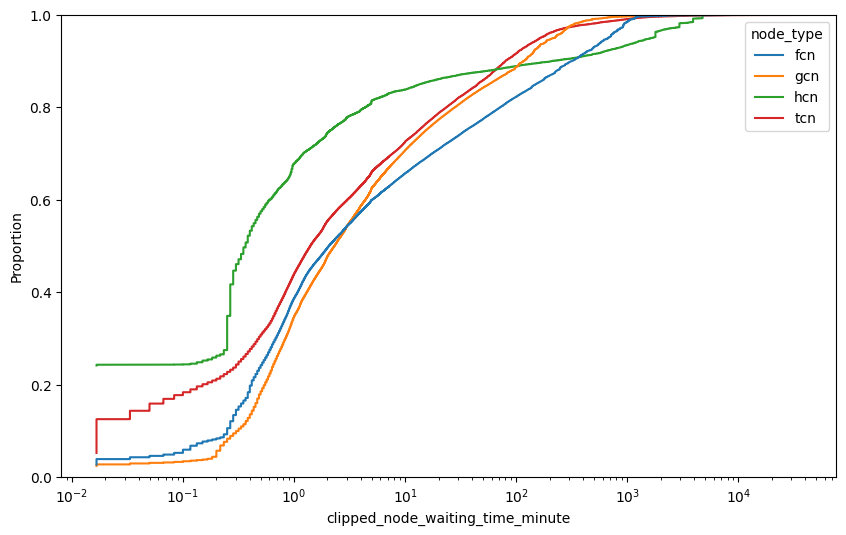

In [14]:
"""
Observations:
    1) We can observe that gcn nodes need to wait longer to get a job.
    2) The second figure shows the statistics for 90 percent quantile for each node.
    It is interesting to see that by waiting 1000 minutes (17 hours) regardless of the type of the node 
    with 90 percent chance it will gets a job. 
    
    3) We have also shown the ecfd for node waiting time for all the nodes. We can see that
    for example, tcn nodes differ in the amount of time they need to wait, meaning it depeneds on the node.
    However, gcn ndoes have similar ecdfs which shows that there is not much of a difference for a gcn nodes in
    term of waiting. It is also perhapse interesting that fcn nodes become very very similar at the end of the figure.
    For instance with 240 minutes almost all fcn nodes will have a job to do. Note this is not the case for tcn 
    or gcn ndoes.
    
"""



# We consider only the positive waiting time, meaning when there was a call to the node
# there as no running jobs on the node
df_waiting_time = df_waiting_time[df_waiting_time['clipped_node_waiting_time_minute']>=0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
# sns.boxplot(data=df_waiting_time, x='clipped_node_waiting_time_minute', y='node_type',
#              log_scale=False, ax=ax) 

sns.ecdfplot(data=df_waiting_time, x='clipped_node_waiting_time_minute', hue='node_type',
             log_scale=True, ax=ax) 

plt.show()





/tmp/ipykernel_3064188/2699560555.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  node_type_loc[node_type].legend(title=None)
/tmp/ipykernel_3064188/2699560555.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  node_type_loc[node_type].legend(title=None)
/tmp/ipykernel_3064188/2699560555.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  node_type_loc[node_type].legend(title=None)
/tmp/ipykernel_3064188/2699560555.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  node_type_loc[no

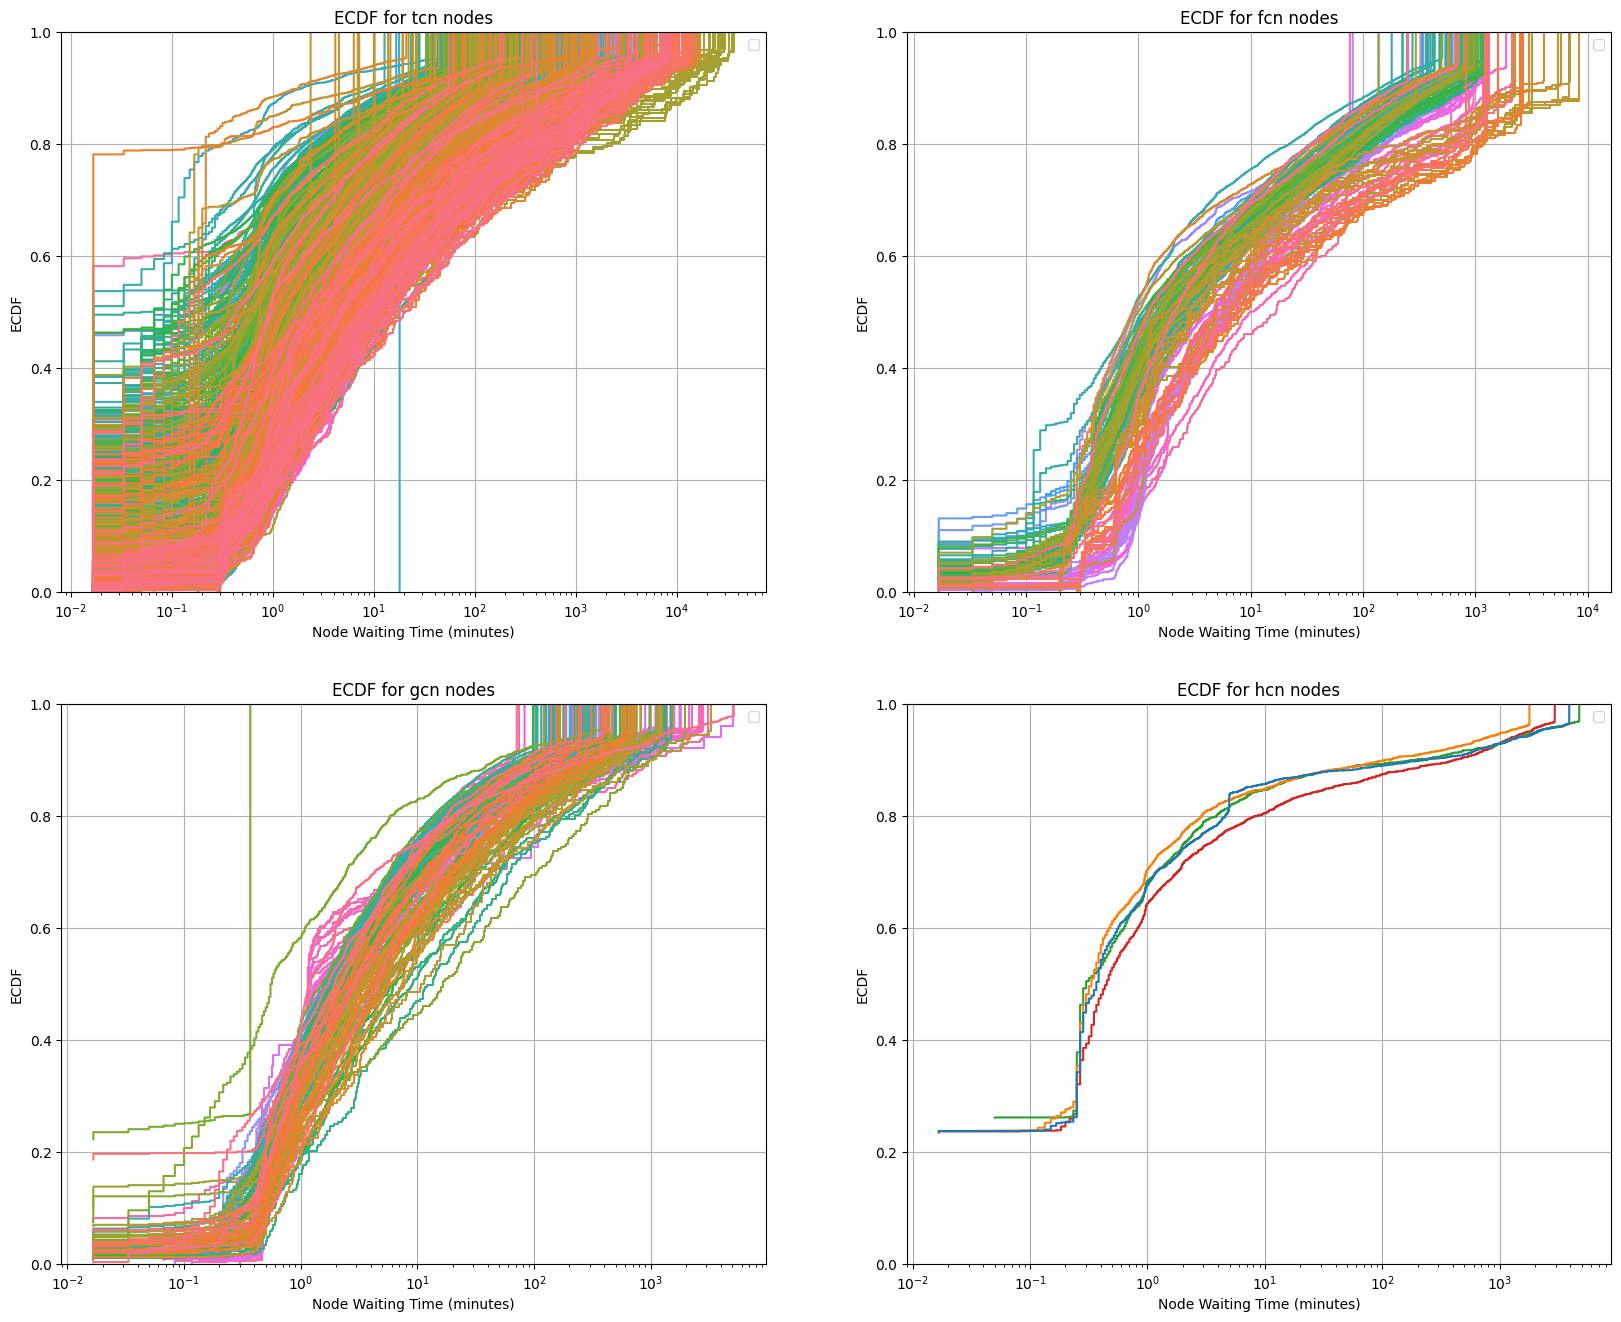

In [15]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
node_type_loc = { 'tcn':ax[0,0],'fcn':ax[0,1], 'gcn':ax[1,0], 'hcn':ax[1,1]}
for node_type in node_type_loc:
    data = df_waiting_time[df_waiting_time['node_type']==node_type]
    sns.ecdfplot(data, x='clipped_node_waiting_time_minute', hue='node_id',
                log_scale=True, ax=node_type_loc[node_type]) 
    node_type_loc[node_type].set_ylabel("ECDF")
    node_type_loc[node_type].set_xlabel("Node Waiting Time (minutes)")
    node_type_loc[node_type].set_title(f"ECDF for {node_type} nodes")
    node_type_loc[node_type].legend(title=None)
    node_type_loc[node_type].grid(True)
plt.show()




In [16]:
# interactive plots:

# fig = px.ecdf(
#     df_waiting_time, 
#     x="clipped_node_waiting_time_minute", 
#     color="node_id",
#     facet_col="node_type",
#     facet_col_wrap=2,
#     log_x=True,  # To apply log scale to the x-axis
# )

# # Remove the legend

# fig.for_each_xaxis(lambda xaxis: xaxis.update(matches=None))
# fig.update_layout(showlegend=False)

# fig.update_layout(
#     title="ECDF for each node type",
#     width=1200,  # Set the desired width
#     height=800   # Set the desired height
# )

# fig.show()

,node_id,job_step_duration_hour,node_type
0,tcn226,644.727500,tcn
1,tcn818,383.314167,tcn
2,hcn2,352.029722,hcn
3,tcn1142,345.159167,tcn
4,tcn1168,345.159167,tcn


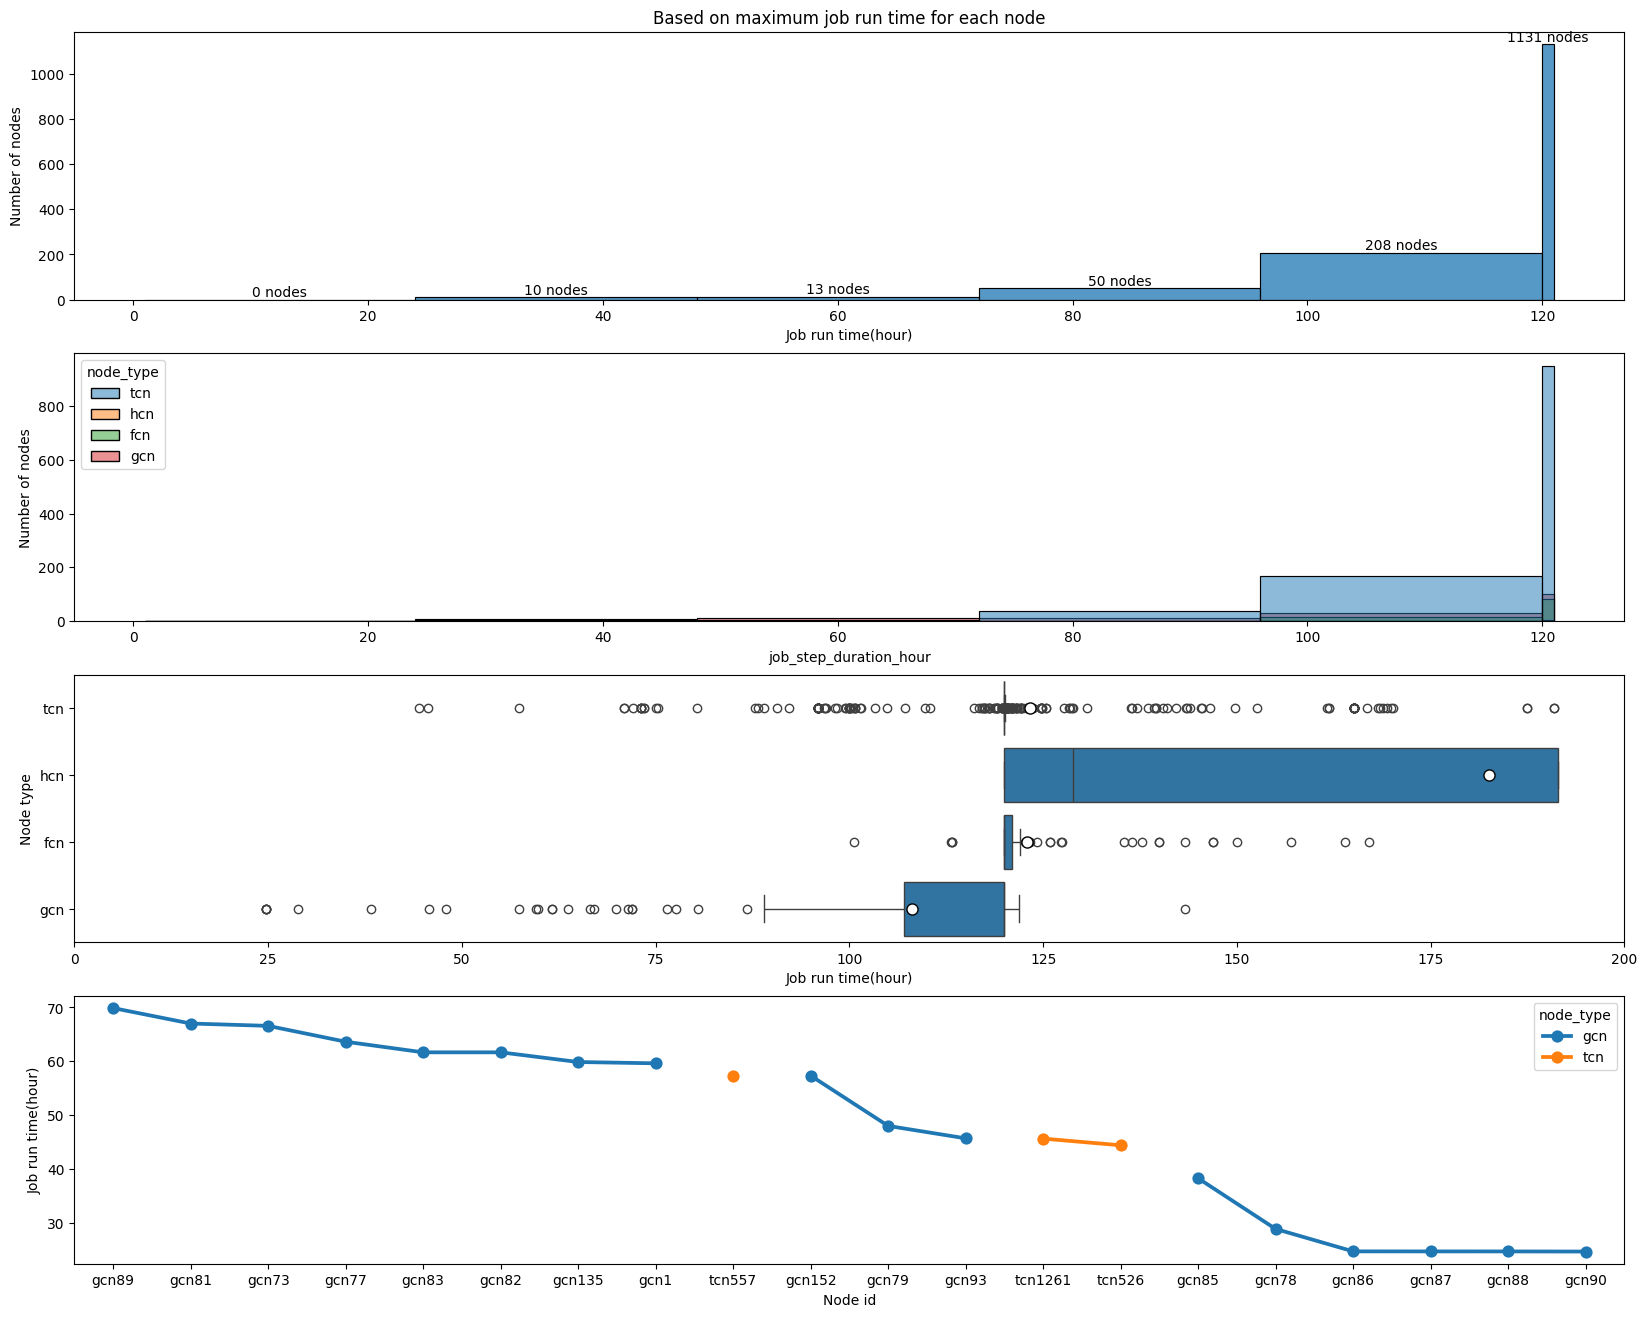

In [17]:
"""
We are interested in the statitstics for job-step durations for the nodes.
Particularly, as the previous analysis showed some of the nodes do not run as many jobs as other nodes.
We show the maximum run time that a  node in its life time through a job has achieved so far.

Observations:
        As we can see for tcn and gcn nodes in many cases they have reached the maximum walltime
        which is 120, though there are some outliers that we check them later.
        We show the nodes that have not woked that long, this is especially intersting for gcn nodes, it seems that
        a few of them have maxtime lower than 6 hours.
        We show the maximum run time for the nodes ranked from smallest value.
        It is intersting perhaps expected that many of these nodes are gcn nodes.
        Also it is a nice coincidence that gcn115 has the feweset jobs and also shortest max time.
        
"""


def job_run_time_stats(stat, signal, bins, x_lim):
    df_temp = (df.groupby(['node_id'])[[signal]]
                        .aggregate(stat)
                        .sort_values(signal, ascending=False)
                        )
    df_temp.reset_index(inplace=True)
    # get the node type based on the node name
    df_temp['node_type'] = df_temp['node_id'].str[0:3]
    
    display(df_temp.head())
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 16))
    g_hist = sns.histplot(df_temp, x=signal, bins=bins, ax=ax[0])
    # g_hist = df_temp.plot(col=['job_step_duration_hour'], by="node_id", bins=bins,
    #                       ax=ax[0], kind='hist')
    g = sns.histplot(df_temp, x=signal, bins=bins, ax=ax[1], hue='node_type')
    g_box= sns.boxplot(df_temp, x=signal, y='node_type', showmeans=True, ax=ax[2],
                meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'8'})    
    sns.pointplot(df_temp.iloc[-20:], x='node_id', y=signal, hue='node_type',ax = ax[3])
    
    [g_hist.bar_label(p, fmt='%i nodes', label_type='edge') for p in g_hist.containers]
    g_box.set_xlim(left=0, right=x_lim)

    ax[0].set_ylabel("Number of nodes")
    ax[0].set_xlabel("Job run time(hour)")
    ax[1].set_ylabel("Number of nodes")
    ax[2].set_xlabel("Job run time(hour)")
    ax[2].set_ylabel("Node type")
    ax[3].set_ylabel("Job run time(hour)")
    ax[3].set_xlabel("Node id")
    names = {'mean': 'Based on average job run time for each node',
             'max': 'Based on maximum job run time for each node',
             'sum': 'Based on total job run time for each node'
             }
    ax[0].set_title(names[stat])
    plt.show()



# duration in hour
df['job_step_duration_hour'] = (df['end_time'] - df['start_time'])/pd.Timedelta('1 hour')
signal = 'job_step_duration_hour'

bins = [1, 24, 48, 72, 96, 120, 121]
job_run_time_stats('max', signal,  bins, x_lim=200)

